# Avaliação Final

## Aprendizado Dinâmico

Profa. **Cibele Russo**

**MBA em Ciências de Dados**

**Atenção: Você deve resolver as questões neste notebook e submetê-lo inteiramente executado no moodle.**

O arquivo de dados **Qualidadedoar.csv** contém dados de qualidade do ar registradas diariamente na Estação Meteorológica da Mooca em São Paulo SP, no período de 01/01/2017 e 31/12/2017, considerando somente a primeira medida do dia do poluente monóxido de carbono (CO).

Fonte: Dados adaptados de Instituto de Energia e Meio Ambiente (https://energiaeambiente.org.br/qualidadedoar/).

1. Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


2. Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.


3. Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


4. Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
        

5. Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos três métodos.



A entrega deve ser feita com um notebook .ipynb, com os códigos usados para a obtenção dos resultados e comentários sobre os resultados em células de texto. Este notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise.

Atenção, se constatado plágio, a questão será zerada.


#### Boa prova!

## Item 1


Faça a leitura dos dados como indicado abaixo, estabeleça um índice por datas. Caso haja dados faltantes para o valor de CO, complete os dados como sugerido. Faça a visualização dos dados com gráfico de linhas e boxplots por semanas. Há evidências de estacionariedade nos gráficos? Por quê? Avalie a estacionariedade utilizando um teste estatístico.


(Adicione quantas células precisar para as análises e conclusões de cada item)

In [85]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [12,6]

caminho = 'https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/Qualidadedoar.csv'

# Leitura dos dados de Qualidade do ar
df = pd.read_csv(caminho, index_col=0, parse_dates=True)

df.head()

,Estacao,Codigo,Poluente,Valor,Unidade,Tipo,Data.1
Data,,,,,,,
2017-01-01,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-01
2017-01-02,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-02
2017-01-04,Mooca,SP40,CO,873.363029,ug/m3,automatica,2017-01-04
2017-01-05,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-05
2017-01-06,Mooca,SP40,CO,499.064588,ug/m3,automatica,2017-01-06


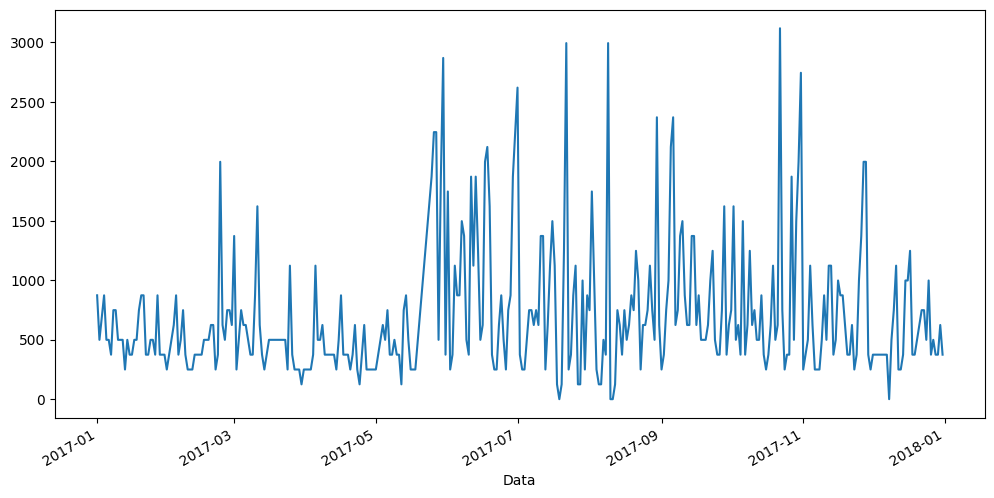

In [86]:
df['Valor'].plot();

In [87]:
df.head()

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(idx)
df.fillna(method='ffill', inplace=True)

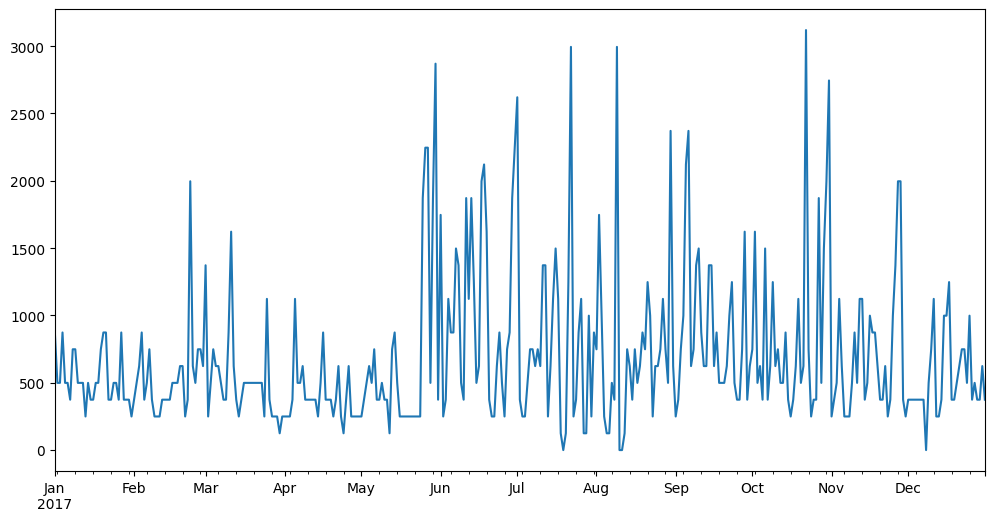

In [88]:
df['Valor'].plot();

In [89]:
from statsmodels.tsa.stattools import adfuller


A série é estacionária, pois o p-value é igual a 0. O que indica que a série é estacionária pelo teste de Dickey-Fulley

In [8]:
result = adfuller(df['Valor'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -13.753778
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [90]:
df['week'] = df.index.to_period('W').week

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

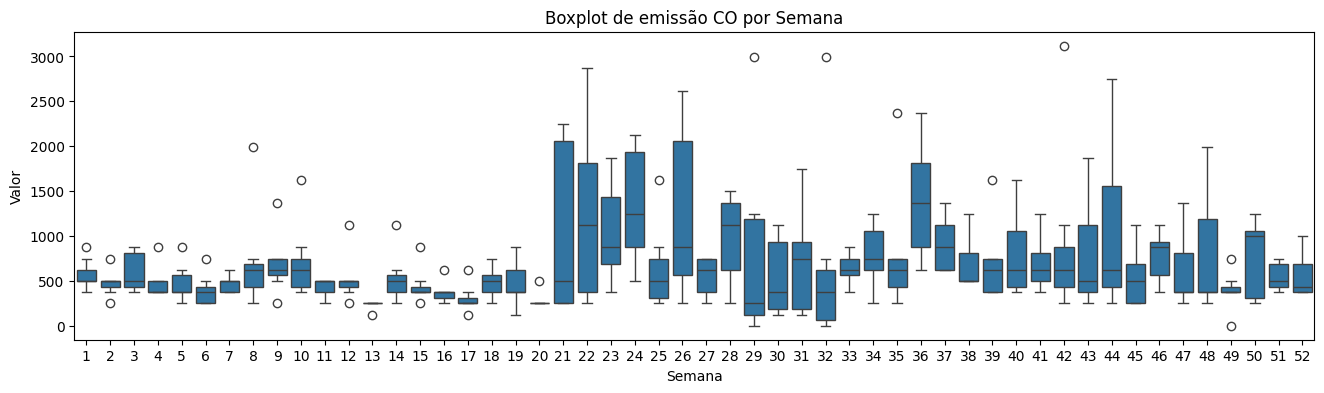

In [97]:
plt.figure(figsize=(16, 4))
sns.boxplot(x='week', y='Valor', data=df)
plt.xlabel('Semana')
plt.ylabel('Valor')
plt.title('Boxplot de emissão CO por Semana')
plt.show()

Observando os box plots por semanas dos anos podemos ver que a série não tem uma média e uma variância constante ao longo do tempo.

## Item 2

Proponha uma decomposição dos dados de monóxido de carbono em tendência e sazonalidade. Comente as componentes de tendência, sazonalidade e resíduos.



In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

- **Tendência**:
   - A linha de tendência não mostra uma linha clara. Tendência irregular

- **Sazonalidade**:
   - Podemos ver que o componente sazonal captura os padrões repetitivos e periódicos dos dados. Mostra que há um ciclo regular que se repetem em intervalos específicos, indicando a presença de sazonalidade na série.

- **Resíduos**:
   - Os resíduos representam a parte dos dados que não é explicada pela tendência ou sazonalidade. Os resíduos se parecem como ruído aleatório, sem padrões discerníveis, o que sugere que a decomposição capturou bem a tendência e a sazonalidade.


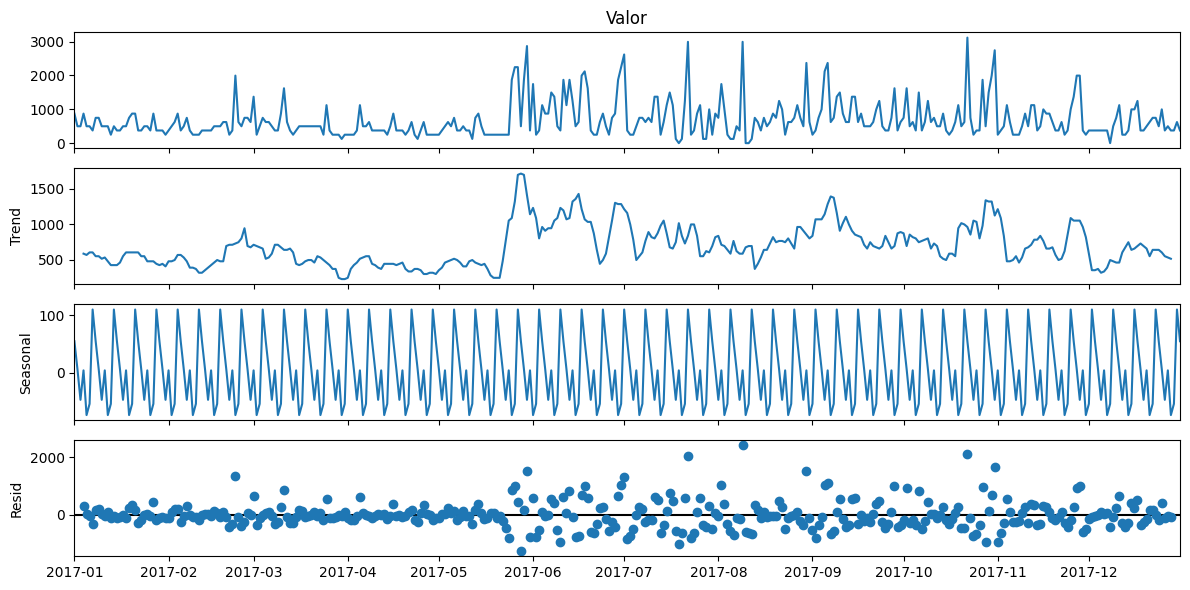

In [11]:
# Decompor a série temporal
decomposicao = seasonal_decompose(df['Valor'], model='adictive', period=7)

# Plotar os componentes
decomposicao.plot()
plt.show()

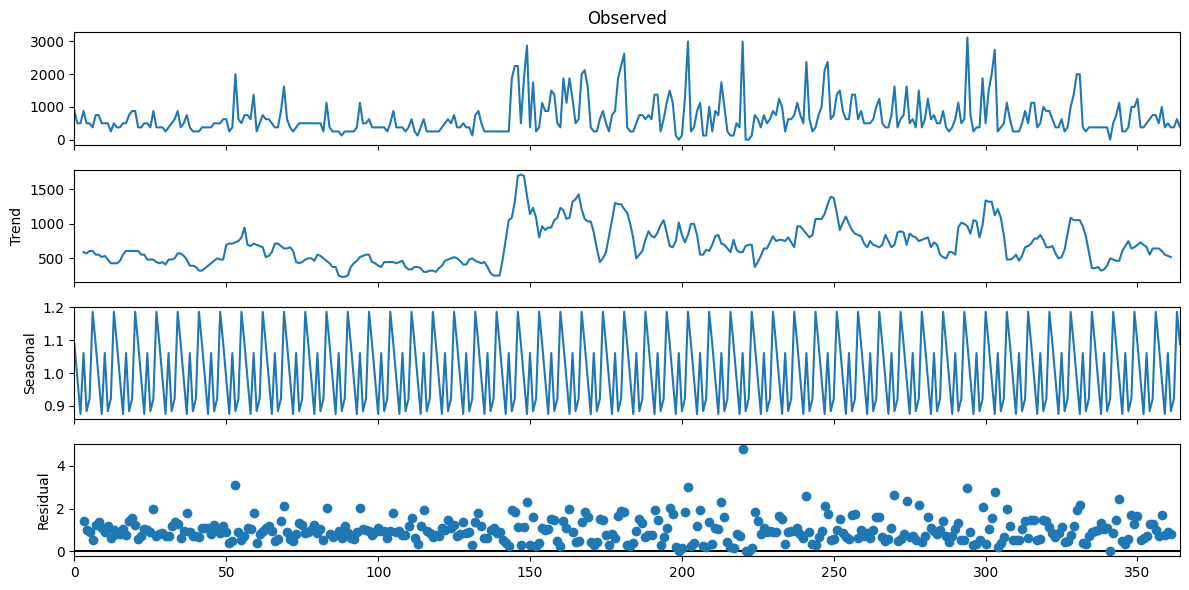

In [12]:
valor = np.array(df['Valor'])

# Adicionar um pequeno valor constante para evitar zeros e negativos
valor_ajustado = valor + 1e-6

# Decompor a série temporal usando o modelo multiplicativo
decomposicao = seasonal_decompose(valor_ajustado, model='multiplicative', period=7)

# Plotar os componentes
decomposicao.plot()
plt.show()

## Item 3

Divida a série de monóxido de carbono registradas em treinamento e teste, com 30 observações na base de teste. A que se referem os dados de treinamento e teste e como essa divisão contribui para a análise de modelos preditivos?


In [13]:
treino = df.iloc[:-30]
teste = df.iloc[-30:]

In [14]:
len(treino), len(teste)

(335, 30)

- Avaliação do modelo. Medir a performance real
- Evitar overfitting. Avaliando sua capacidade de generalização
- Utilizar validação cruzada
- Ajuste de hiperparâmetroe
- Testar o modelo

Separar os conjuntos em treino e teste ajuda de várias formas. As razões mais importantes são:

**Avaliação do Modelo**:  
Dividir os dados permite medir a performance real do modelo em dados que ele nunca viu antes. Isso ajuda a garantir que o modelo consiga generalizar com dados do reais.

**Evitar Overfitting:**   
Ao avaliar a capacidade de generalização do modelo, a separação ajuda a evitar o overfitting.

**Validação Cruzada:**   
Utilizar técnicas como a validação cruzada permite uma avaliação mais robusta do modelo, dividindo os dados em múltiplos subconjuntos de treino e teste.

**Ajuste de Hiperparâmetros:**   
Separar os dados permite ajustar os hiperparâmetros do modelo de forma mais eficaz, utilizando o conjunto de validação para encontrar os melhores parâmetros sem influenciar o conjunto de teste.

**Teste do Modelo:**   
Também, o conjunto de teste é usado para testar o modelo final, fornecendo uma estimativa de sua performance.

## Item 4

Utilizando a base de treinamento de monóxido de carbono registrado, obtenha:

    - As previsões de Holt-Winters.
    
    - As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).
    
    - As previsões com o método Theta usual.
    
    - As previsões com um modelo de redes dinâmicas LSTM.
        

        

   

### As previsões de Holt-Winters

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
ajustado_HW = ExponentialSmoothing(treino['Valor'],trend='add',seasonal='add',seasonal_periods=7).fit()
holt_winters = ajustado_HW.forecast(30).rename('Previsão Holt-Winters')


In [43]:
# treino[['Valor', 'Holt-Winters']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

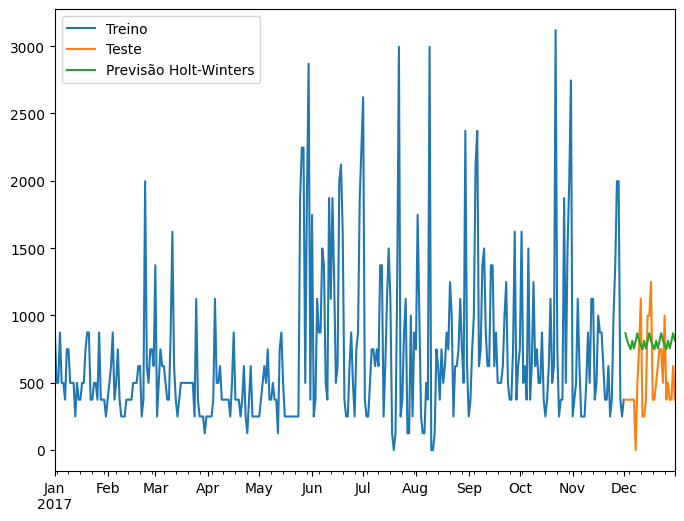

In [44]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
holt_winters.plot(legend=True,label='Previsão Holt-Winters');

### As previsões obtidas pelo melhor modelo ARIMA (para este item não considere as componentes com sazonalidade), com ordens selecionadas segundo critério preestabelecido (auto_arima), para a variável em estudo. Identifique a natureza das componentes desse melhor modelo (por exemplo, "o modelo possui componentes autorregressiva não-sazonal de tal ordem", "médias móveis não-sazonal de tal ordem", etc).

In [45]:
# Funções específicas para a modelagem e previsão
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)

import pmdarima as pm

In [46]:
# Novo comando para auto_arima a partir de pm (pmdarima)
stepwise_fit = pm.auto_arima(treino['Valor'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=0,
                          seasonal=False,
                          d=0, trace=True, # Serie estacionária
                          error_action='ignore',   # se uma ordem não funcionar, ignorar
                          suppress_warnings=True,  # ignorar avisos
                          stepwise=True)           # executa stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5509.147, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5253.896, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5360.116, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5242.022, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5225.716, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5208.200, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5197.259, Time=0.11 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=5193.661, Time=0.11 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=5165.114, Time=0.53 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=5163.332, Time=0.52 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5161.421, Time=0.41 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5160.228, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5162.205, Time=0.41 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5162.254, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2575.114
Date:                Sun, 22 Sep 2024   AIC                           5160.228
Time:                        12:27:56   BIC                           5179.298
Sample:                    01-01-2017   HQIC                          5167.831
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2654      0.038     33.102      0.000       1.191       1.340
ar.L2         -0.3828      0.065     -5.867      0.000      -0.511      -0.255
ar.L3          0.1166      0.049      2.372      0.018       0.020       0.213
ma.L1         -0.9534      0.018    -53.760      0.000      -0.988      -0.919
sigma2      2.756e+05   1.56e+04     17.683      0.000    2.45e+05    3.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               312.28
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.01   Skew:                             1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
import warnings
warnings.filterwarnings("ignore")

modelo_arima = ARIMA(endog=treino['Valor'],order=(3,0,1))
resultados = modelo_arima.fit()
fcast_arima = resultados.predict(len(treino),len(treino)+29,typ='levels').rename('Previsões ARIMA(0,1,0) ')
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Valor   No. Observations:                  335
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -2572.174
Date:                Sun, 22 Sep 2024   AIC                           5156.349
Time:                        13:10:27   BIC                           5179.234
Sample:                    01-01-2017   HQIC                          5165.472
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        703.7603    141.963      4.957      0.000     425.518     982.003
ar.L1          1.2252      0.052     23.677      0.000       1.124       1.327
ar.L2         -0.3721      0.066     -5.628      0.000      -0.502      -0.243
ar.L3          0.1214      0.051      2.388      0.017       0.022       0.221
ma.L1         -0.9219      0.039    -23.526      0.000      -0.999      -0.845
sigma2      2.731e+05   1.78e+04     15.357      0.000    2.38e+05    3.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               362.14
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                             1.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
len(teste)

30

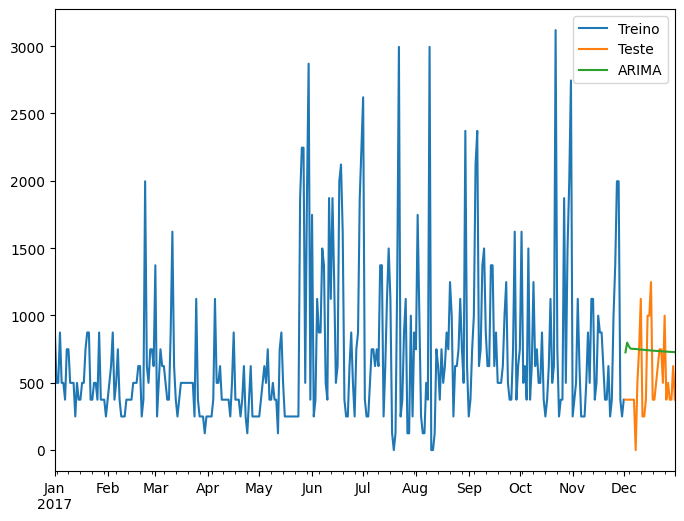

In [76]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
fcast_arima.plot(legend=True,label='ARIMA');

### As previsões com o método Theta usual.

In [25]:
from statsmodels.tsa.forecasting.theta import ThetaModel

In [49]:

res = ThetaModel(treino['Valor'],deseasonalize=True,period=7).fit()
fcast_theta = res.forecast(30)

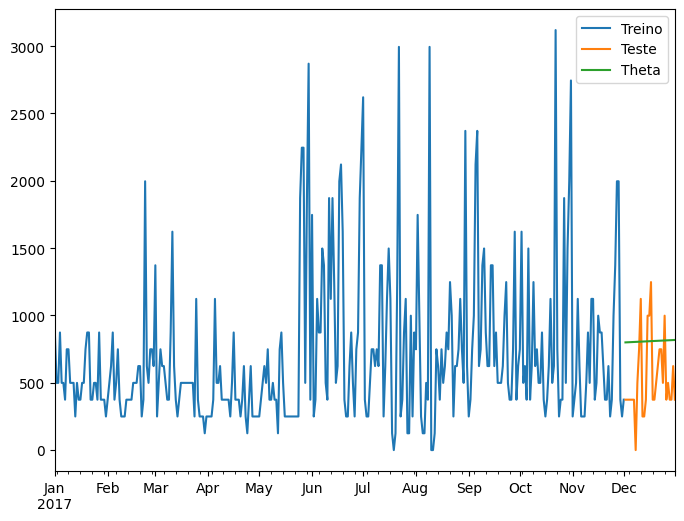

In [50]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(8,6));
fcast_theta.plot(legend=True,label='Theta');

### As previsões com um modelo de redes dinâmicas LSTM.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler


In [29]:
scaler = MinMaxScaler()

In [30]:
# Ajustar o scaler aos dados de treino
scaler.fit(treino['Valor'].values.reshape(-1, 1))

# Transformar os dados de treino e teste
scaled_train = scaler.transform(treino['Valor'].values.reshape(-1, 1))
scaled_test = scaler.transform(teste['Valor'].values.reshape(-1, 1))

In [31]:
n_input = 7

In [32]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [33]:
X,y = generator[0]

In [34]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(generator,epochs=250)

Epoch 1/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0456
Epoch 2/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0378
Epoch 3/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0233
Epoch 4/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0313
Epoch 5/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0378
Epoch 6/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0361
Epoch 7/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0327
Epoch 8/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0302
Epoch 9/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0262
Epoch 10/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0254
Epoch 11/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0347
Epoch 12/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0366
Epoch 13/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0282
Epoch 14/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0268
Epoch 15/250
328/328 ━━━━━━━━━━━━━━━━━━━━ 1

In [35]:
train_predict = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [39]:
train_predict

array([[444.76566]], dtype=float32)

In [36]:
# Inverter a normalização para obter os valores originais
train_predict = scaler.inverse_transform(train_predict)
y = scaler.inverse_transform(y)

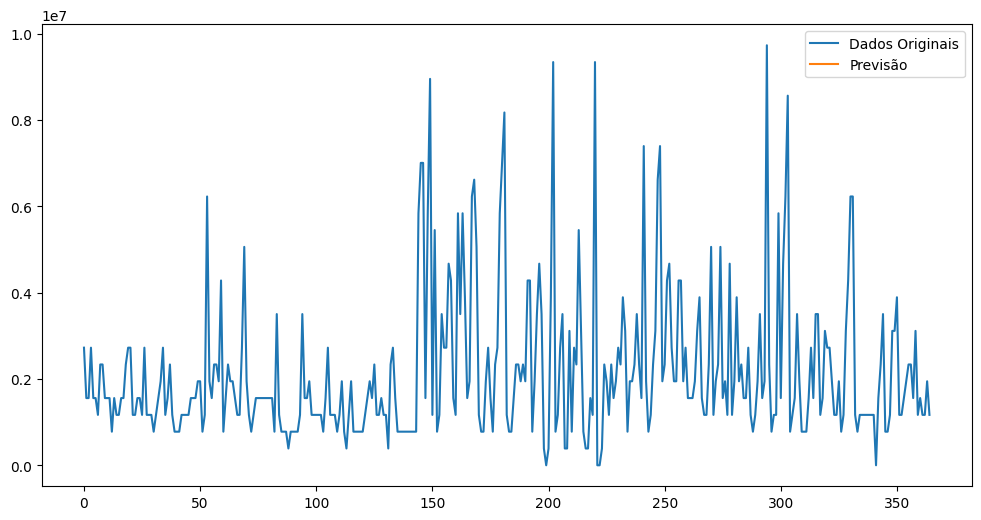

In [37]:
plt.plot(scaler.inverse_transform(df['Valor'].values.reshape(-1, 1)), label='Dados Originais')
plt.plot(train_predict, label='Previsão')
plt.legend()
plt.show()

## Item 5

Utilize o erro absoluto médio para comparar as previsões obtidas com as observações da base de teste. Escolha o método que produz as melhores previsões. Justifique sua resposta. Represente em um mesmo gráfico a base de treinamento, de teste e as previsões obtidas pelos quatro métodos.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [104]:
y_true = teste['Valor']
y_pred = fcast_arima
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Métricas ARIMA')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Erro Quadrático Absoluto (MAE): {mae}')


Erro Quadrático Médio (MSE): 123368.9409100039
Erro Quadrático Absoluto (MAE): 314.1784441934609


In [105]:
# y_true = teste['Valor']
y_pred = fcast_theta
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Métricas Método Theta')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Erro Quadrático Absoluto (MAE): {mae}')

Métricas Método Theta
Erro Quadrático Médio (MSE): 152660.51445850552
Erro Quadrático Absoluto (MAE): 356.10828882616994


In [106]:
y_true = teste['Valor']
y_pred = holt_winters
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Métricas Holt Winters')
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Erro Quadrático Absoluto (MAE): {mae}')

Métricas Holt Winters
Erro Quadrático Médio (MSE): 144994.22719911273
Erro Quadrático Absoluto (MAE): 347.86766591297487


<Axes: >

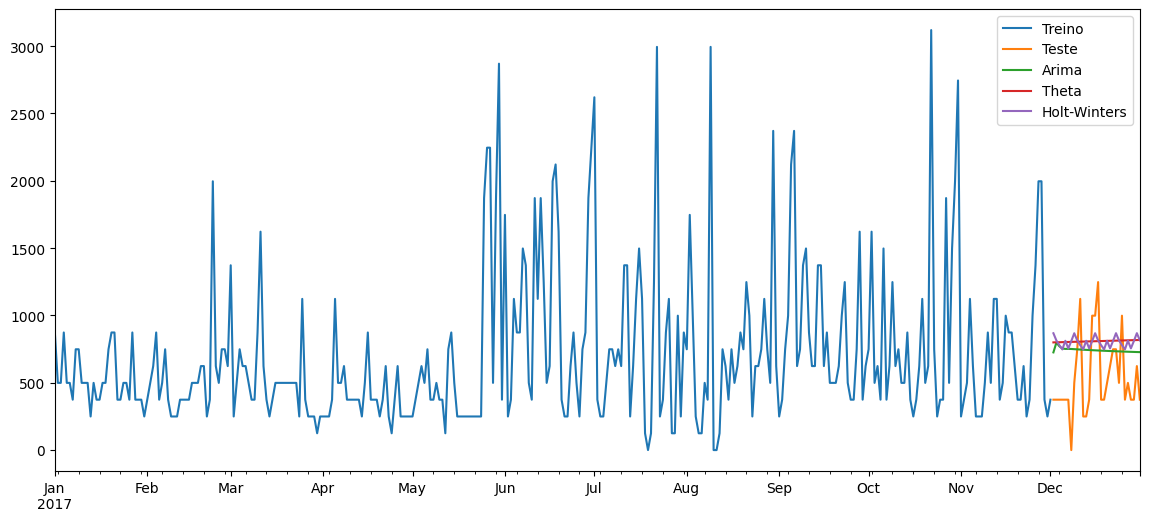

In [108]:
treino['Valor'].plot(legend=True,label='Treino')
teste['Valor'].plot(legend=True,label='Teste',figsize=(14,6));
fcast_arima.plot(legend=True,label='Arima')
fcast_theta.plot(legend=True,label='Theta')
holt_winters.plot(legend=True,label='Holt-Winters')

Arima foi melhor por que teve um erro quadrático absoluto menor que os outros 3 modelos